# Exercise

1. Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following:
![activity_image](img_embed/watermark_save.jpg "watermark_example")

*Image courtesy: [Unsplash](https://unsplash.com/).*

Notice the watermark added to the bottom left of the image. *You are free to design your own watermark icon.*

In [5]:
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

if cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?

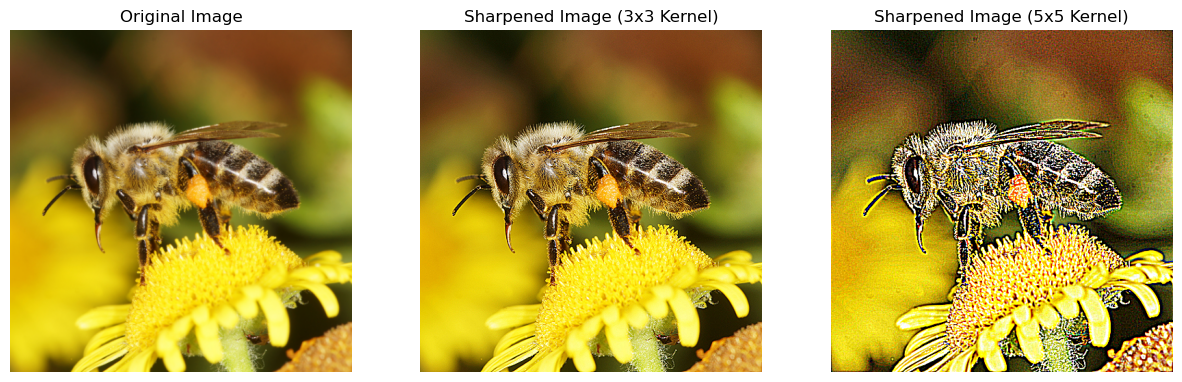

In [8]:
# Load the original image
image = cv.imread('images/images/native-bee.png')

# Check if the image is loaded
if image is None:
    print("Could not open or find the image.")
else:
    # Convert the image to RGB (OpenCV uses BGR by default)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Define the 3x3 sharpening kernel
    kernel_3x3 = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

    # Define the 5x5 sharpening kernel
    kernel_5x5 = np.array([
        [-1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1],
        [-1, -1, 25, -1, -1],
        [-1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1]
    ])

    # Apply the 3x3 sharpening kernel
    sharpened_3x3 = cv.filter2D(image_rgb, -1, kernel_3x3)

    # Apply the 5x5 sharpening kernel
    sharpened_5x5 = cv.filter2D(image_rgb, -1, kernel_5x5)

    # Display the original and sharpened images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(sharpened_3x3)
    plt.title('Sharpened Image (3x3 Kernel)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(sharpened_5x5)
    plt.title('Sharpened Image (5x5 Kernel)')
    plt.axis('off')
    
    plt.show()

2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

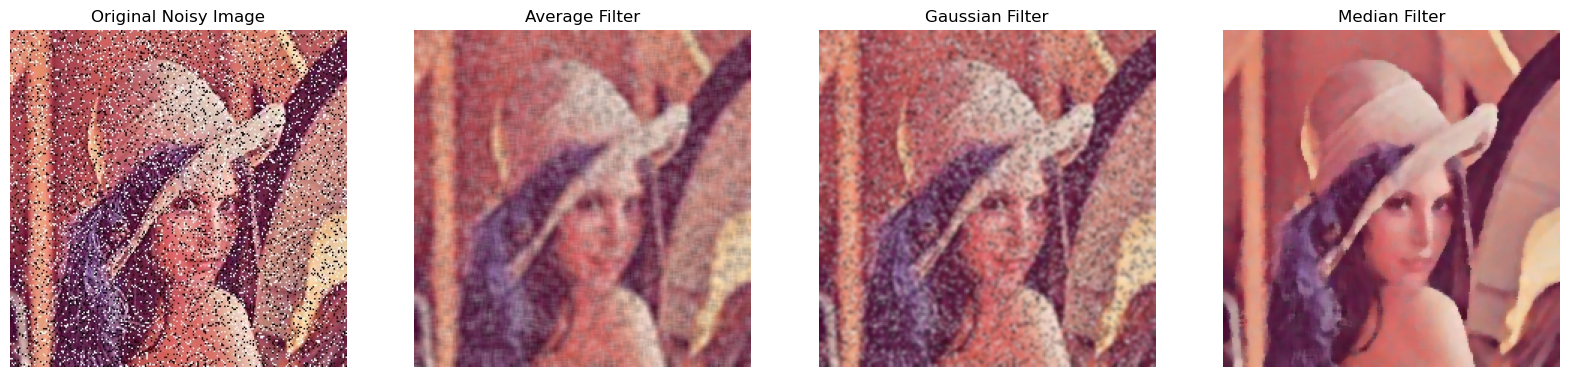

In [11]:
# Load the noisy image
image = cv.imread('images/images/noise_lena.jpg')

# Check if the image is loaded
if image is None:
    print("Could not open or find the image.")
else:
    # Convert the image to RGB (OpenCV uses BGR by default)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Apply the average filter
    average_filtered = cv.blur(image_rgb, (5, 5))

    # Apply the Gaussian filter
    gaussian_filtered = cv.GaussianBlur(image_rgb, (5, 5), 0)

    # Apply the median filter
    median_filtered = cv.medianBlur(image_rgb, 5)

    # Display the original and filtered images
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title('Original Noisy Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(average_filtered)
    plt.title('Average Filter')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(gaussian_filtered)
    plt.title('Gaussian Filter')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(median_filtered)
    plt.title('Median Filter')
    plt.axis('off')
    
    plt.show()

3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

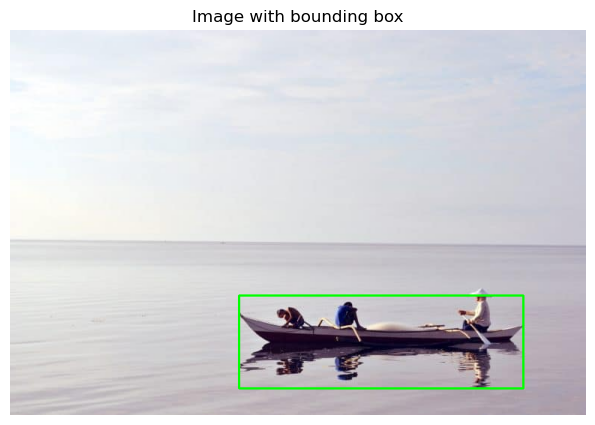

In [20]:
# Load the input image
image = cv.imread('images/images/boat.jpg')
# Check if the image is loaded
if image is None:
    print("Could not open or find the image.")
else:
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    _, threshold = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    
    contours, _ = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    largest_contour = max(contours, key=cv.contourArea)
    x, y, w, h = cv.boundingRect(largest_contour)

    cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    mask = np.zeros(gray.shape, np.uint8)
    cv.drawContours(mask, [largest_contour], 0, 255, -1)
    segmented = cv.bitwise_and(image, image, mask=mask)

    result = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.title('Image with bounding box')
    plt.imshow(result)
    plt.axis('off')

    plt.show()